In [1]:
import pandas as pd
import geopandas as gp
import numpy as np
import geoplot as gplt
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [2]:
road = gp.read_file('grid_-73.94666666666666_40.855555555555554.gpkg')
building = gp.read_file('grid_b_-73.94666666666666_40.855555555555554.gpkg')
road['count'] = road['count'].astype(float)
building['count'] = building['count'].astype(float)

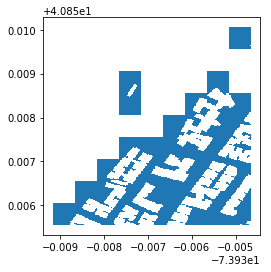

In [34]:
road.plot()

In [4]:
grid = gp.GeoDataFrame(pd.concat([road, building]))
del grid['index']
del grid['index_right']
grid['count'] = grid['count'].fillna(0.)

/home/robert/miniconda3/envs/geopandas/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [5]:
poly = Polygon(((-73.939, 40.8555), (-73.939, 40.86), (-73.937, 40.86), (-73.937, 40.8555)))
test = gp.GeoDataFrame(geometry = [poly])

In [6]:
test1 = gp.sjoin(grid, test, op='intersects')

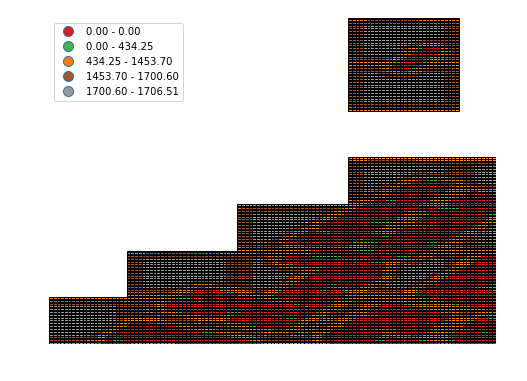

In [7]:
gplt.choropleth(test1, hue='count', legend=True)

In [8]:
del building['index_right']
test2 = gp.sjoin(building, test, op='intersects')

/home/robert/miniconda3/envs/geopandas/lib/python3.7/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


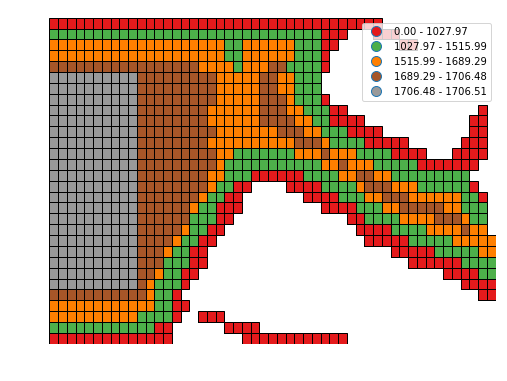

In [9]:
gplt.choropleth(test1[:1000], hue='count', legend=True)

In [28]:
long = np.arange(-73.939, -73.935, 0.001)
lat = np.arange(40.8555, 40.86, 0.001)

In [29]:
long = np.append(long, [long[-1] + 0.001])
lat = np.append(lat, [lat[-1] + 0.001])

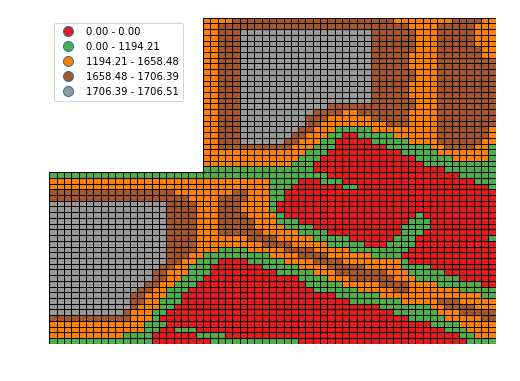

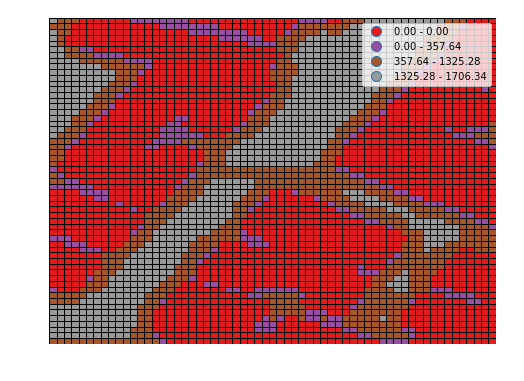

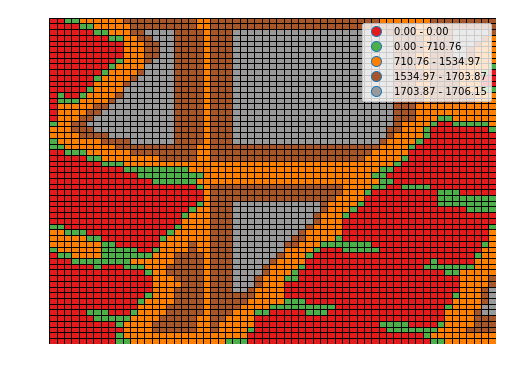

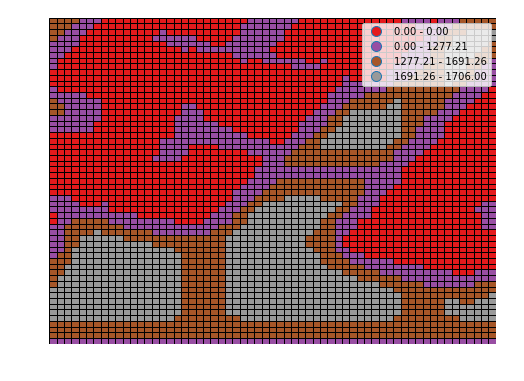

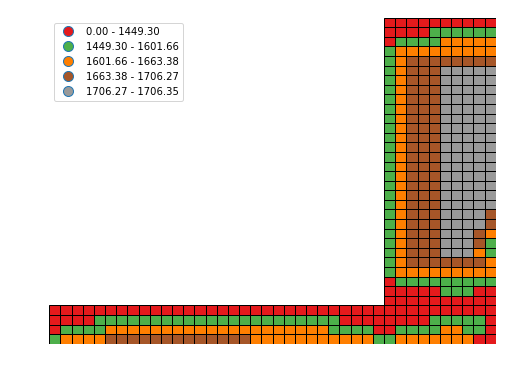

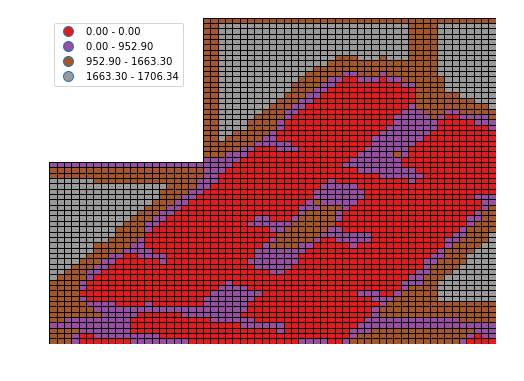

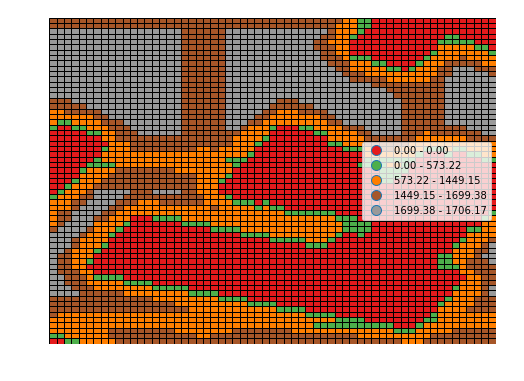

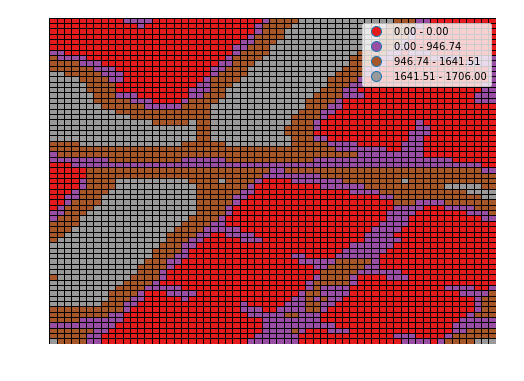

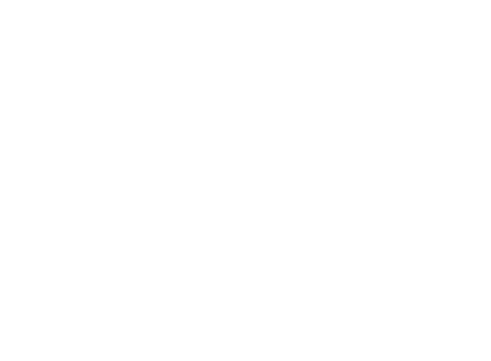

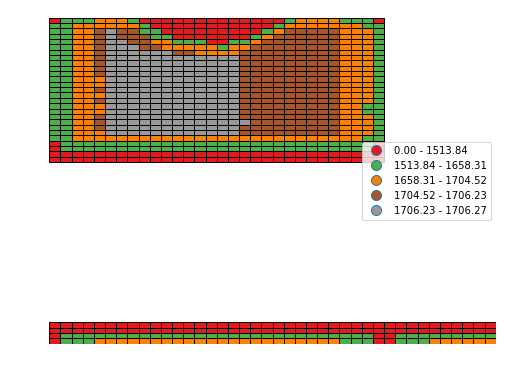

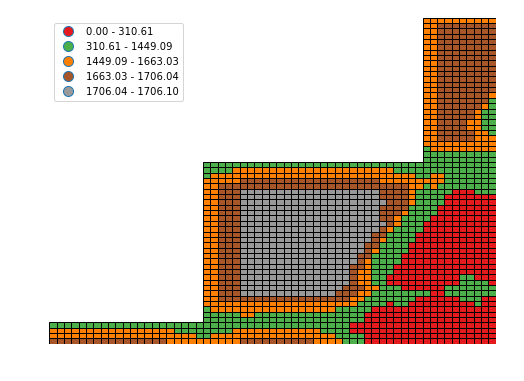

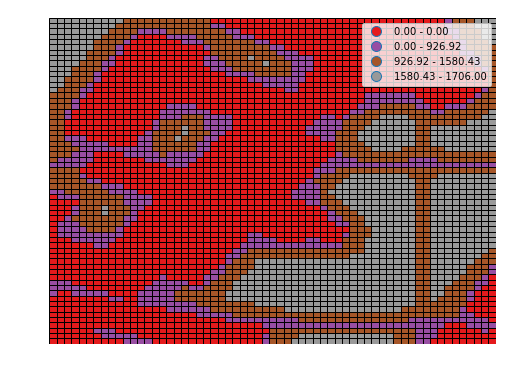

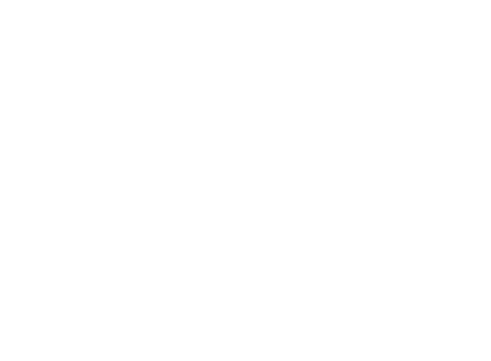

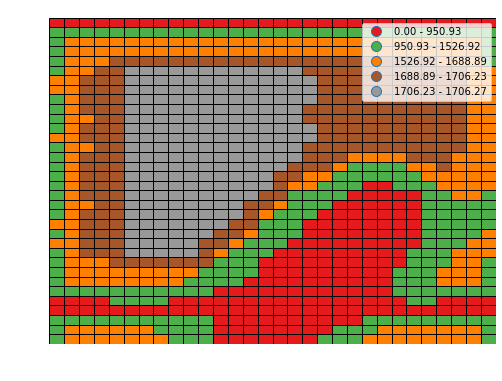

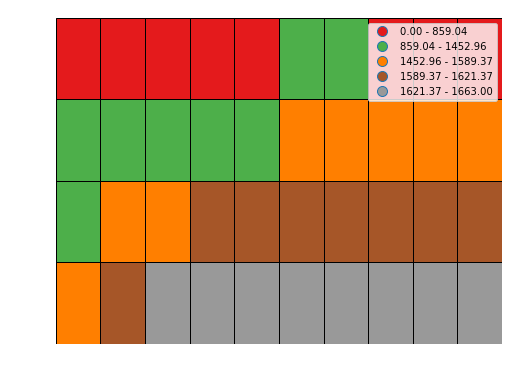

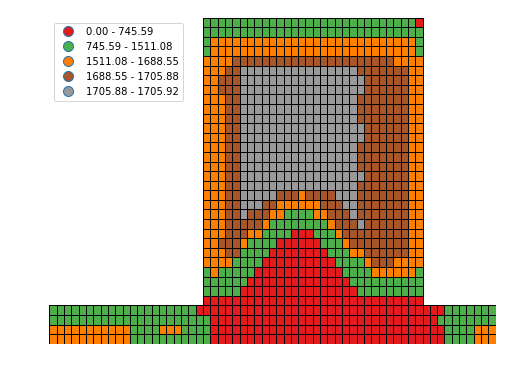

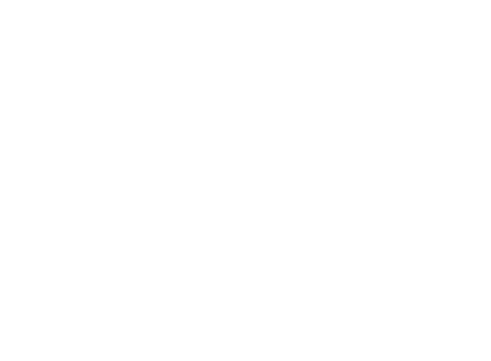

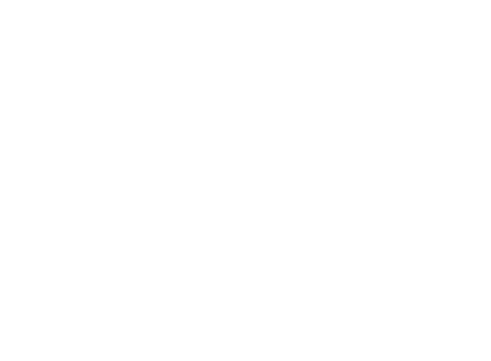

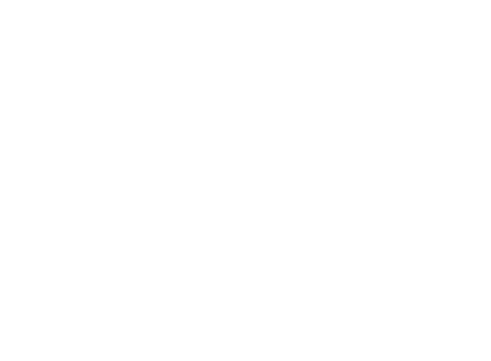

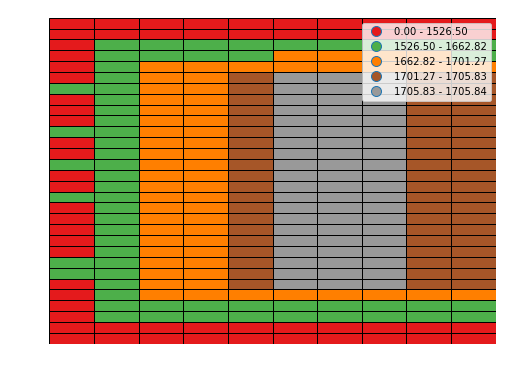

In [32]:
for l in range(len(lat)-1):
    for lo in range(len(long)-1):
        poly = Polygon(((long[lo], lat[l]), (long[lo], lat[l+1]), (long[lo+1], lat[l+1]), (long[lo+1], lat[l])))
        test = gp.GeoDataFrame(geometry = [poly])
        test1 = gp.sjoin(grid, test, op='intersects')
        gplt.choropleth(test1, hue='count', legend=True)
        plt.savefig(str(l)+"_"+str(lo)+'.png')

In [26]:
print(long, lat)

[-73.939 -73.938 -73.937] [40.8555 40.8565 40.8575 40.8585 40.8595 40.8605]


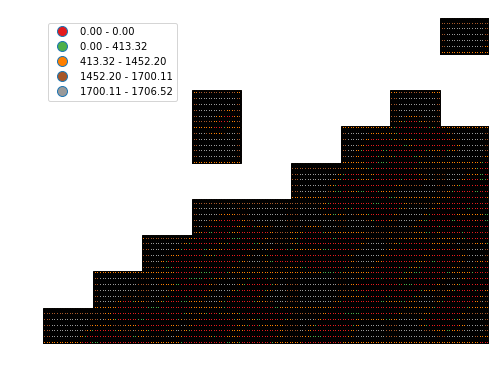

In [33]:
gplt.choropleth(grid, hue='count', legend=True)